In [1]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]
 [9.77285781e-02 9.79999398e-02 9.82492362e-02 ... 1.78017668e+01
  3.31949451e+01 1.00000000e+02]
 [1.94564038e-01 1.95079364e-01 1.95571794e-01 ... 3.25508775e+01
  5.25319172e+01 1.00000000e+02]
 ...
 [1.09833188e+01 1.09852627e+01 1.18069178e+01 ... 6.65319630e+01
  8.41474937e+01 1.00000000e+02]
 [1.05613851e+01 1.05613851e+01 1.19880861e+01 ... 6.07622066e+01
  8.32156259e+01 1.00000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]]


<IPython.core.display.Javascript object>


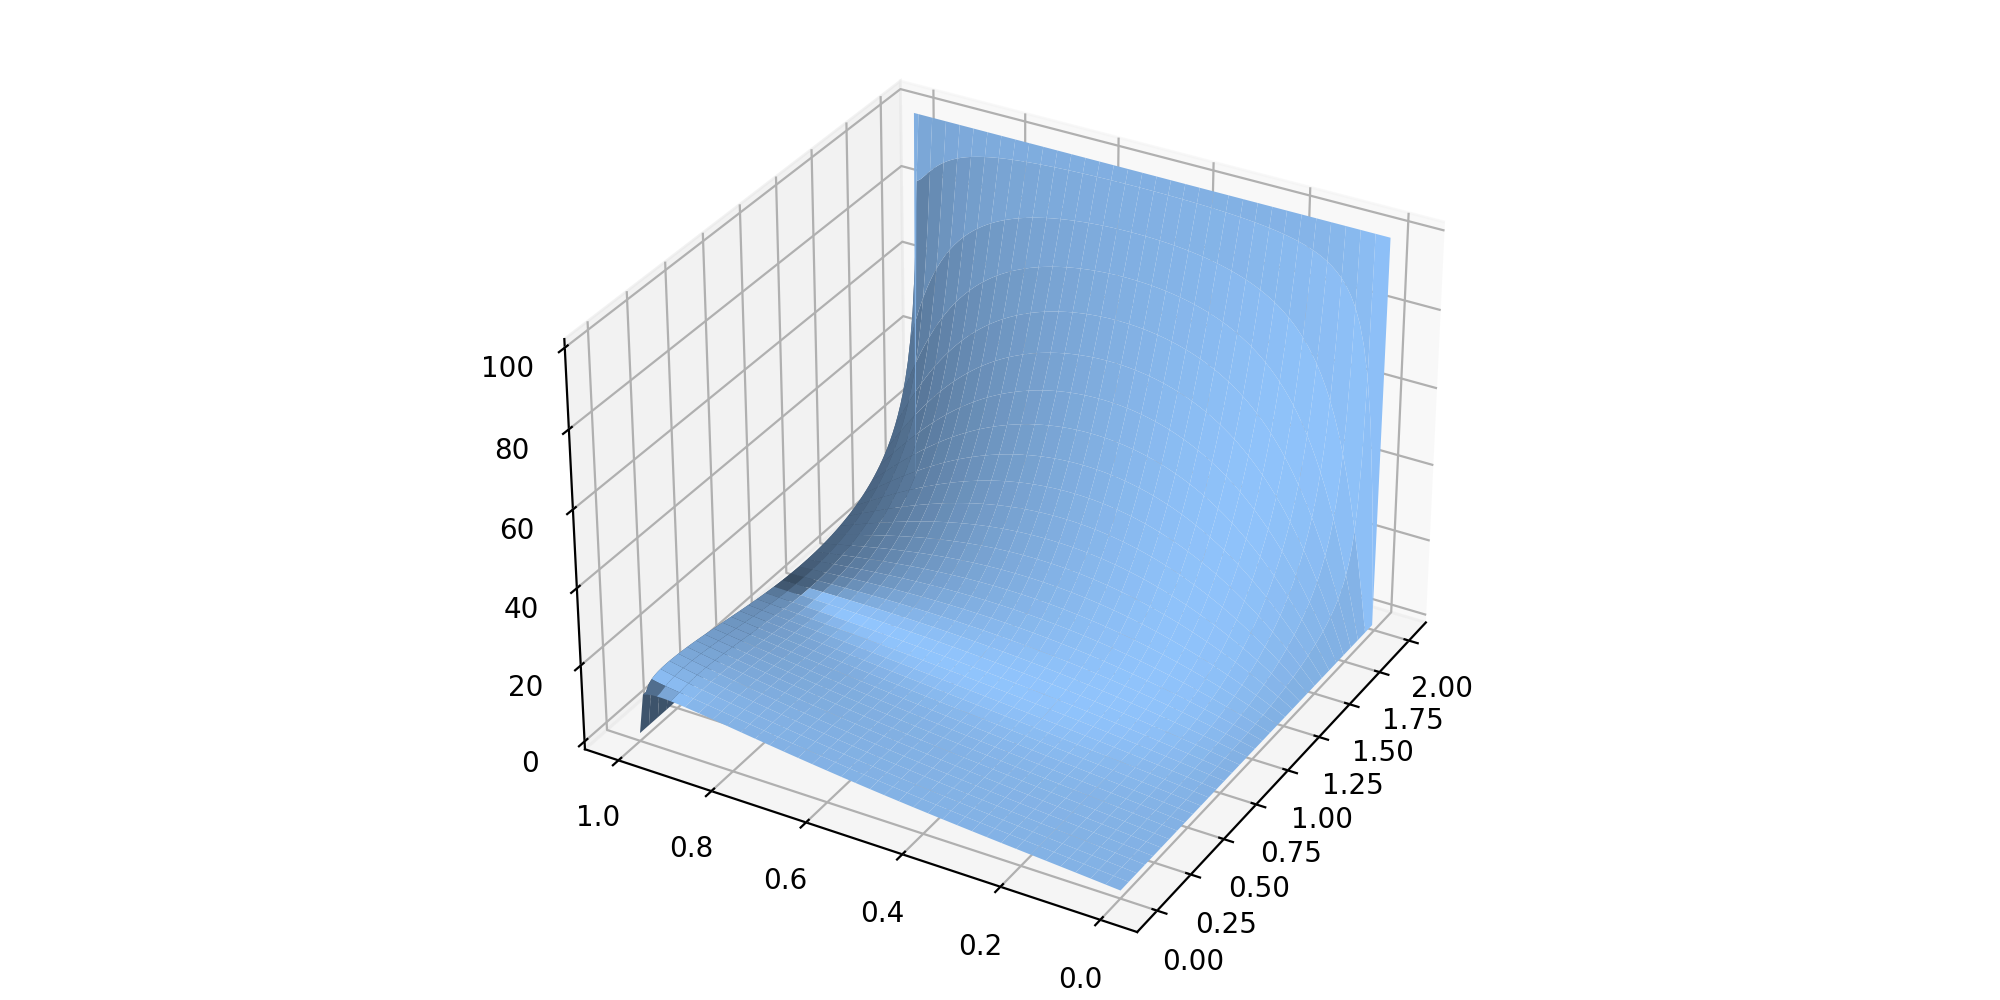

--- 167.10784482955933 seconds ---


In [22]:
start_time = time.time()
lambd = 10
#f0 = 10
q = 1000
L_x = 2
L_y = 1
m = 100
n = 100
h_x = L_x / m
h_y = L_y / n
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)
r_i = len(x_i)
r_j = len(y_j)
g_y_x = np.zeros([r_j, r_i]) #сетка размером r_j * r_i
Temp = 100
for i in range(r_i): #гран условие при y = 0
    g_y_x[0][i] = 0
for j in range(r_j): #гран условие при x = X
    g_y_x[j][r_i-1] = Temp
for i in range(r_i):
    for j in range(r_j):
        g_y_x[j][i] += 0
print(g_y_x)
alph1 = np.zeros([r_i])
beta1 = np.zeros([r_i])
alph2 = np.zeros([r_j])
beta2 = np.zeros([r_j])
#задаем f
def f0(c, x, y, T):
    return c * (1 + x * y)
#задаем лямбду
def lambd_x_y(lambd, x, y):
    return lambd * (1 + x ** 2 * y)
def lambd_m_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y + h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y + h_y))
def lambd_m_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y - h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y - h_y))
def lambd_n_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x + h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x + h_x, y))
def lambd_n_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x - h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x - h_x, y))
#задаем беты
def beta_N(lambd, x, y):
    return lambd_m_plus(lambd, x, y) * h_x / h_y
def beta_S(lambd, x, y):
    return lambd_m_minus(lambd, x, y) * h_x / h_y
def beta_W(lambd, x, y):
    return lambd_n_minus(lambd, x, y) * h_y / h_x
def beta_E(lambd, x, y):
    return lambd_n_plus(lambd, x, y) * h_y / h_x
def beta_P(lambd, x, y):
    return beta_N(lambd, x, y) + beta_S(lambd, x, y) + beta_W(lambd, x, y) + beta_E(lambd, x, y)
for s in range(300):
    # продольная прогонка
    for j in range(1,r_j-1):
        #beta_N = lambd * h_x / h_y
        #beta_W = lambd * h_y / h_x
        #beta_S = lambd * h_x / h_y
        #beta_E = lambd * h_y / h_x
        #beta_P = beta_E + beta_N + beta_S + beta_W
        #нет потока
        alph1[0] = 1
        beta1[0] = 0
        for i in range(1,r_i-1):
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j])
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(100, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y
            alph1[i] = -E / (W * alph1[i - 1] - P)
            beta1[i] = (-F - N * g_y_x[j+1][i] - S * g_y_x[j-1][i] - W * beta1[i-1]) / (W * alph1[i - 1] - P)
        #g_y_x[j][r_i-1] = (-F - N * g_y_x[j+1][r_i-1] - S * g_y_x[j-1][r_i-2] - W * beta1[r_i-2]) / (-P + W * alph1[r_i-2]) 
        for m in range(r_i - 2, -1, -1):
            g_y_x[j][m] = g_y_x[j][m + 1] * alph1[m] + beta1[m]
    # поперечная прогонка   
    for i in range(1,r_i-1):
        alph2[0] = 0
        beta2[0] = 0
        for j in range(1,r_j-1):
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j])
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(100, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            alph2[j] = -N / (S * alph2[j - 1] - P)
            beta2[j] = (-F -E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * beta2[j-1]) / (S * alph2[j - 1] - P)
        #g_y_x[r_j-2][i] =  (-F - E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * q * h_y / lyambd) / (S - P)
        if i == 1: g_y_x[r_j-2][0] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        g_y_x[r_j-2][i] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        for m in range(r_j - 3, -1, -1):
            g_y_x[m][i] = g_y_x[m+1][i] * alph2[m] + beta2[m]
    

    
print(g_y_x)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
axes.plot_surface(xgrid, ygrid, g_y_x)
print("--- %s seconds ---" % (time.time() - start_time))
plt.show() 